# Reference graph from nested sequences

Treating all occurrences of elements that are non-sequences, or that are strings, as distinct leaves.

In [1]:
from collections.abc import Sequence
import itertools

from graphviz import Digraph, Graph
from typeguard import typechecked

In [2]:
@typechecked
def is_stringy(obj: object) -> bool:
    """Check if obj is string-like."""
    return isinstance(obj, bytearray | bytes | str)

In [3]:
@typechecked
def build_graph(root: object) -> Digraph:
    """Build a digraph of references starting in a nested collection."""
    vis = dict[int, object]()  # Stores visitation info and keeps objects alive.
    graph = Digraph()
    leaf_counter = itertools.count()
    
    @typechecked
    def add_edge(parent_name: str | None, current_name: str) -> None:
        if parent_name is not None:
            graph.edge(parent_name, current_name)
    
    @typechecked
    def dfs(parent_name: str | None, current_obj: object) -> None:
        if not isinstance(current_obj, Sequence) or is_stringy(current_obj):
            current_name = f'leaf-{next(leaf_counter)}'
            graph.node(current_name, label=repr(current_obj))
            add_edge(parent_name, current_name)
            return
        
        current_id = id(current_obj)
        current_name = str(current_id)
        seen_before = current_id in vis
        
        if not seen_before:
            vis[current_id] = current_obj
            graph.node(current_name, shape='point')
        
        add_edge(parent_name, current_name)
        
        if seen_before:
            return
        
        for child_obj in current_obj:
            dfs(current_name, child_obj)
    
    dfs(None, root)
    return graph

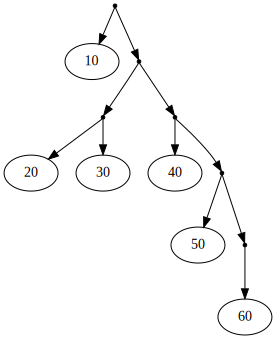

In [4]:
build_graph([10, ([20, 30], [40, (50, [60])])])

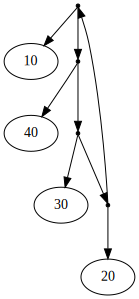

In [5]:
a = [10]
b = [20, a]
c = [30, b]
d = [40, c]
a.append(d)
build_graph(a)

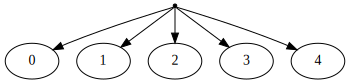

In [6]:
build_graph(range(5))

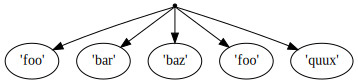

In [7]:
build_graph('foo bar baz foo quux'.split())

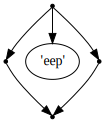

In [8]:
build_graph([[()], 'eep', [()]])

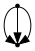

In [9]:
build_graph([(), (), ()])  # Not guaranteed to have 1 leaf.

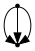

In [10]:
t = ()
build_graph([t, t, t])  # Guaranteed to have 1 leaf.

In [11]:
from recursion import nest

In [12]:
t = nest(seed=7, degree=2, height=3)
t

(((7, 7), (7, 7)), ((7, 7), (7, 7)))

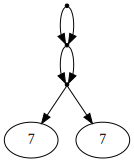

In [13]:
build_graph(t)

In [14]:
rows = [[]] * 5
rows

[[], [], [], [], []]

In [15]:
rows[1].append('hi')
rows

[['hi'], ['hi'], ['hi'], ['hi'], ['hi']]

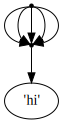

In [16]:
build_graph(rows)

In [17]:
rows = [[] for _ in range(5)]
rows

[[], [], [], [], []]

In [18]:
rows[1].append('hi')
rows

[[], ['hi'], [], [], []]

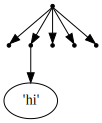

In [19]:
build_graph(rows)

In [20]:
t = nest(7, 2, 10)
t

((((((((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))),
      ((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7))))),
     (((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))),
      ((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))))),
    ((((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))),
      ((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7))))),
     (((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))),
      ((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7))))))),
   (((((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7)))),
      ((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7, 7))))),
     (((((7, 7), (7, 7)), ((7, 7), (7, 7))),
       (((7, 7), (7, 7)), ((7, 7), (7

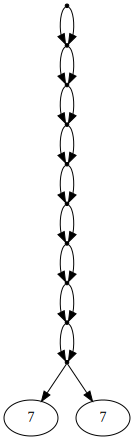

In [21]:
build_graph(t)

In [22]:
repr(t).count('7')

1024

In [23]:
t = nest(7, 2, 100)

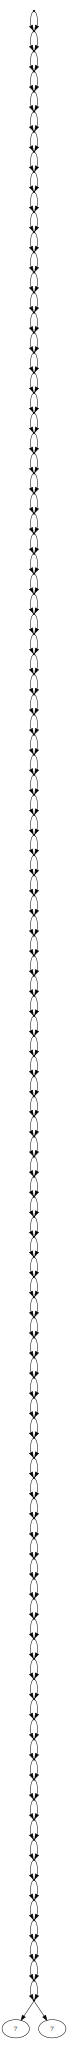

In [24]:
build_graph(t)

In [25]:
# hash(t)

In [26]:
t = (2, 3, 7)

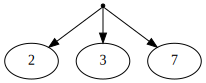

In [27]:
build_graph(t)

In [28]:
t = ((1, 2), (3, 4), (5, 6))

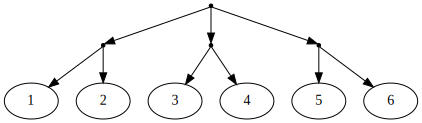

In [29]:
build_graph(t)

In [30]:
t = (((1,2),3), (4, 5), (6, 7))

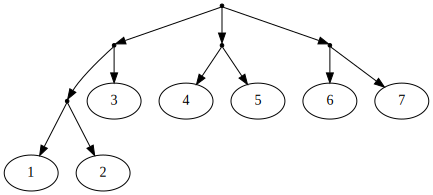

In [31]:
build_graph(t)

In [32]:
t = ((1, 2), (3, 4), (5, 6))

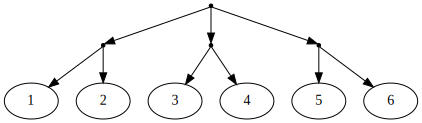

In [33]:
build_graph(t)

In [34]:
t = (((1,2),3), (4, 5), (6, 7))

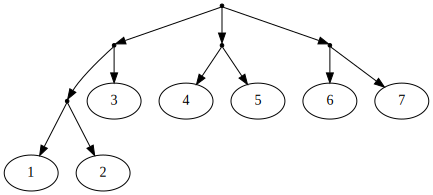

In [35]:
build_graph(t)

In [36]:
t = ((1, 2, 3), (4, 5), (6, 7))

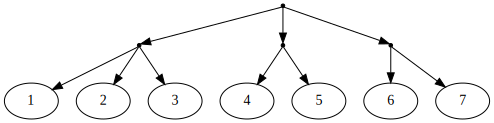

In [37]:
build_graph(t)

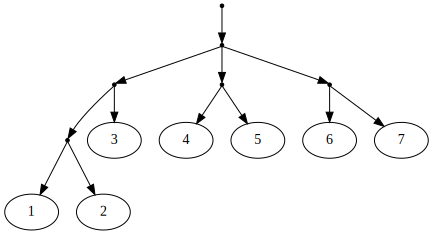

In [38]:
t = (((1,2),3), (4, 5), (6, 7))
r = (t,)
build_graph(r)

In [39]:
t =     ((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
     (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
      (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))

In [40]:
t

((((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1))))),
 (((1, (0, 1)), ((0, 1), (1, (0, 1)))),
  (((0, 1), (1, (0, 1))), ((1, (0, 1)), ((0, 1), (1, (0, 1)))))))

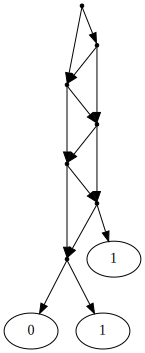

In [42]:
build_graph(t)